In [1]:
!python3 -m io
import pandas as pd
import numpy as np
import csv
from google.colab import files
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,log_loss,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import io

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


**Uploading CSV Files**

The next cell asks the executor to upload csv files on the notebook which are later used in the code. (I will email you those csv files with descriptions)

In [3]:
uploaded = files.upload()

Saving SubmissionFile.csv to SubmissionFile.csv
Saving test_values.csv to test_values.csv
Saving train_values.csv to train_values.csv


**Preparing the Training and Test sets**

One Hot Encoding of the training and test sets. Please note that as this is a competition, the test set doesn't contain the correct answers. The "test_values.csv" contains the data that needs to be predicted (as probabilities) and submitted. As a result, "train_values.csv" is divided (75:25) for training and testing different models. 

In [4]:
train_values_df = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
test_values_df = pd.read_csv(io.BytesIO(uploaded['test_values.csv']))

data_X = train_values_df.iloc [:,1:-1].to_numpy()
data_Y = train_values_df.iloc [:,-1].to_numpy()

#One Hot Encoding For Categorical Features
my_encoder_X = OneHotEncoder(categorical_features = [0,1,3,4,5,6,9,12])
data_X_transformed = my_encoder_X.fit_transform(data_X).toarray()

my_encoder_Y = OneHotEncoder()
data_Y_transformed = my_encoder_Y.fit_transform(data_Y.reshape(-1,1)).toarray()

X_train = data_X_transformed[51:]
Y_train = data_Y[51:]


X_test = data_X_transformed[:51]
Y_test = data_Y[:51]


submission_data_X = test_values_df.iloc [:,1:].to_numpy()
submission_data_X_transformed = my_encoder_X.fit_transform(submission_data_X).toarray()


print(submission_data_X_transformed.shape)





(90, 28)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data w

In [5]:
#Decision Tree 
decision_tree = DecisionTreeClassifier(random_state=0, criterion='gini',max_depth=4)

decision_tree.fit(X_train,Y_train)
predictions = decision_tree.predict(X_test)
score = accuracy_score(predictions,Y_test)
#logloss = log_loss(Y_test,predictions) 

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)

****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.67      0.78      0.72        18

    accuracy                           0.78        51
   macro avg       0.77      0.78      0.77        51
weighted avg       0.80      0.78      0.79        51

Accuracy= 78.43137254901961
Confusion Matrix (TN,FP,FN,TP)= 26 7 4 14
Precision = 66.66666666666666
Recall = 77.77777777777779
Specificity = 78.78787878787878
F1 Score = 71.7948717948718


In [7]:
#Logistic Regression
logistic_regression = LogisticRegression(solver='lbfgs', penalty="none", fit_intercept=False)

logistic_regression.fit(X_train,Y_train)
predictions = logistic_regression.predict(X_test)
prob_pred = logistic_regression.predict_proba(X_test)
score = accuracy_score(predictions,Y_test)
#print(prob_pred)
#logloss = log_loss(Y_test,predictions) 

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:",str(roc_auc))

****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.82      0.78      0.80        18

    accuracy                           0.86        51
   macro avg       0.85      0.84      0.85        51
weighted avg       0.86      0.86      0.86        51

Accuracy= 86.27450980392157
Confusion Matrix (TN,FP,FN,TP)= 30 3 4 14
Precision = 82.35294117647058
Recall = 77.77777777777779
Specificity = 90.9090909090909
F1 Score = 80.0
AUC: 0.8434343434343433


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [27]:
#Writing Logistic Regression Results on the Submission CSV file. 
logistic_regression = LogisticRegression(solver='lbfgs', penalty="none", fit_intercept=False)
logistic_regression.fit(X_train,Y_train)
predictions = logistic_regression.predict(submission_data_X_transformed)
prob_pred = logistic_regression.predict_proba(submission_data_X_transformed)
#print(prob_pred)

output_list = []
with open('SubmissionFile.csv') as csv_file:
  reader = csv.reader(csv_file)
  output_list = list(reader)
csv_file.close()

#prob_pred = np array, converting it to python list for output processing
prob_list = prob_pred.tolist()
print(prob_list)

output_list[0].append('heart_disease_present')
counter = 1
for items in prob_list:
  output_list[counter].append(items[1])
  counter+=1
  
print(output_list)

#writing output list to csv_file
with open("FinalFile.csv",'w') as csv_file:
  writer = csv.writer(csv_file)
  writer.writerows(output_list)
csv_file.close()

files.download("FinalFile.csv")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[0.7616746525993736, 0.23832534740062644], [0.8010820334052642, 0.19891796659473582], [0.013152657642794274, 0.9868473423572057], [0.9847447659839131, 0.015255234016086841], [0.006390985942124394, 0.9936090140578756], [0.9849220342716886, 0.01507796572831149], [0.9684406004796662, 0.03155939952033382], [0.05028346181368437, 0.9497165381863156], [0.77600950894505, 0.22399049105494992], [0.955027605717261, 0.044972394282739074], [0.6209876212844648, 0.37901237871553517], [0.3723527244654178, 0.6276472755345822], [0.6077263329442466, 0.39227366705575334], [0.002016457273072203, 0.9979835427269278], [0.9783984229957869, 0.021601577004213102], [0.9927848833738292, 0.007215116626170751], [0.9958513584066745, 0.004148641593325509], [0.9943569931282672, 0.005643006871732781], [0.12724955966035878, 0.8727504403396412], [0.9865469833687412, 0.013453016631258767], [0.00454185730820178, 0.9954581426917982], [0.698074940410877, 0.3019250595891229], [0.8482475765739775, 0.1517524234260225], [0.9954

In [0]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators = 300, max_depth = 28, min_samples_leaf = 1)
random_forest.fit(X_train,Y_train)
predictions = random_forest.predict(X_test)
prob_pred = random_forest.predict_proba(X_test)

score = accuracy_score(predictions,Y_test)

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)


false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:",str(roc_auc))
#print(prob_pred)

****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.68      0.72      0.70        18

    accuracy                           0.78        51
   macro avg       0.76      0.77      0.77        51
weighted avg       0.79      0.78      0.79        51

Accuracy= 78.43137254901961
Confusion Matrix (TN,FP,FN,TP)= 27 6 5 13
Precision = 68.42105263157895
Recall = 72.22222222222221
Specificity = 81.81818181818183
F1 Score = 70.27027027027027
AUC: 0.7702020202020202


In [0]:
#Tuning The Previous Random Forest Model (estimators)
n_estimators_val = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results= []
test_results = []

for estimators in n_estimators_val:
  random_forest = RandomForestClassifier(n_estimators = estimators)
  random_forest.fit(X_train,Y_train)
  
  train_predictions = random_forest.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_predictions)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  #print(estimators,str(roc_auc))
  
  test_predictions = random_forest.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, test_predictions)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  print(estimators,str(roc_auc))
  
#line1 = plt.plot(np.array(n_estimators_val), np.array(train_results), 'b', label='Train AUC')
#line2 = plt.plot(np.array(n_estimators_val), np.array(test_results), 'r', label='Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel('AUC score')
#plt.xlabel('Estimator')
#plt.show()

  
  
  

      

1 0.7424242424242422
2 0.6641414141414141
4 0.7171717171717171
8 0.7727272727272727
16 0.8005050505050506
32 0.7424242424242422
64 0.7272727272727272
100 0.7272727272727272
200 0.7853535353535355


1.0 0.7323232323232324
2.0 0.8282828282828283
3.0 0.73989898989899
4.0 0.8005050505050506
5.0 0.7727272727272727
6.0 0.7878787878787877
7.0 0.6691919191919192
8.0 0.7727272727272727
9.0 0.6136363636363635
10.0 0.7424242424242422
11.0 0.7297979797979798
12.0 0.7424242424242422
13.0 0.7146464646464646
14.0 0.702020202020202
15.0 0.7727272727272727
16.0 0.7575757575757576
17.0 0.7575757575757576
18.0 0.7272727272727272
19.0 0.712121212121212
20.0 0.7474747474747475
21.0 0.744949494949495
22.0 0.7727272727272727
23.0 0.7474747474747475
24.0 0.696969696969697
25.0 0.7727272727272727
26.0 0.73989898989899
27.0 0.7575757575757576
28.0 0.7424242424242422
29.0 0.845959595959596
30.0 0.7601010101010102
31.0 0.7146464646464646
32.0 0.7727272727272727


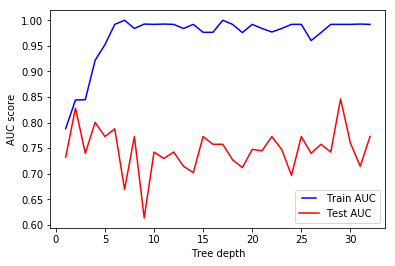

In [0]:
#Tuning The Previous Random Forest Model (depth)
depth_vals = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in depth_vals:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1,n_estimators = 10)
  rf.fit(X_train, Y_train)
  
  train_pred = rf.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  
  
  y_pred = rf.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
  print(max_depth,str(roc_auc))
  


  
line1, = plt.plot(depth_vals, train_results, 'b', label='Train AUC')
line2, = plt.plot(depth_vals, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


In [0]:
#SGD Classifier
sgd_classifier = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, shuffle=True)
sgd_classifier.fit(X_train, Y_train)
predictions = sgd_classifier.predict(X_test)

score = accuracy_score(Y_test,predictions)
print(score*100)

print("****HEART DISEASE PREDICTION RESULTS****\n")
classification_rep = classification_report(Y_test,predictions)
print("--->Overall Classification Report\n\n")
print(classification_rep)
print("==========")

#print("Log Loss=",str(logloss))
print("Accuracy=",str(score*100))

confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()
print("Confusion Matrix (TN,FP,FN,TP)=",tn,fp,fn,tp)

precision = tp/(tp+fp) * 100
print("Precision =",precision)

recall = tp/(tp+fn) * 100
print("Recall =",recall)

specificity = tn/(tn+fp) * 100
print("Specificity =",specificity)

f1_score = 2*precision*recall/(precision+recall)
print("F1 Score =",f1_score)


70.58823529411765
****HEART DISEASE PREDICTION RESULTS****

--->Overall Classification Report


              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.55      0.89      0.68        18

    accuracy                           0.71        51
   macro avg       0.73      0.75      0.70        51
weighted avg       0.78      0.71      0.71        51

Accuracy= 70.58823529411765
Confusion Matrix (TN,FP,FN,TP)= 20 13 2 16
Precision = 55.172413793103445
Recall = 88.88888888888889
Specificity = 60.60606060606061
F1 Score = 68.08510638297871
